In [12]:
#program 8a.

import pandas as pd
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import mixem
data = pd.read_csv("faithful.csv")
fig = figure(title="Old Faithful Data", x_axis_label="Eruption duration (minutes)", y_axis_label="Waiting time (minutes)")
fig.scatter(x=data.eruptions, y=data.waiting)
show(fig)

In [15]:
weights, distributions, ll = mixem.em(np.array(data), [
    mixem.distribution.MultivariateNormalDistribution(np.array((2, 50)), np.identity(2)),
    mixem.distribution.MultivariateNormalDistribution(np.array((4, 80)), np.identity(2)),
])

iteration    0 (log-likelihood=-1.31816e+04): p(x|Φ) = 0.302*MultiNorm[μ=[ 2.004 52.791], σ=[[ 0.057  0.131], [ 0.131 19.805]]] + 0.698*MultiNorm[μ=[ 4.129 78.728], σ=[[ 0.472  3.253], [ 3.253 52.118]]]
iteration    1 (log-likelihood=-1.00484e+03): p(x|Φ) = 0.328*MultiNorm[μ=[ 1.997 53.718], σ=[[ 0.049  0.149], [ 0.149 27.396]]] + 0.672*MultiNorm[μ=[ 4.214 79.274], σ=[[ 0.296  2.073], [ 2.073 46.503]]]
iteration    2 (log-likelihood=-9.72641e+02): p(x|Φ) = 0.342*MultiNorm[μ=[ 2.009 54.189], σ=[[ 0.051  0.278], [ 0.278 31.635]]] + 0.658*MultiNorm[μ=[ 4.257 79.593], σ=[[ 0.217  1.482], [ 1.482 42.599]]]
iteration    3 (log-likelihood=-9.60532e+02): p(x|Φ) = 0.35*MultiNorm[μ=[ 2.023 54.382], σ=[[ 0.059  0.365], [ 0.365 33.352]]] + 0.65*MultiNorm[μ=[ 4.277 79.799], σ=[[ 0.187  1.173], [ 1.173 39.149]]]
iteration    4 (log-likelihood=-9.55735e+02): p(x|Φ) = 0.354*MultiNorm[μ=[ 2.032 54.435], σ=[[ 0.065  0.4  ], [ 0.4   33.497]]] + 0.646*MultiNorm[μ=[ 4.285 79.913], σ=[[ 0.176  1.015], [ 1.0

In [16]:
N = 100
x = np.linspace(np.min(data.eruptions), np.max(data.eruptions), num=N)
y = np.linspace(np.min(data.waiting), np.max(data.waiting), num=N)
xx, yy = np.meshgrid(x, y, indexing="ij")

# Convert meshgrid into a ((N*N), 2) array of coordinates
xxyy = np.array([xx.flatten(), yy.flatten()]).T

# Compute model probabilities
p = mixem.probability(xxyy, weights, distributions).reshape((N, N))

fig2 = figure(title="Fitted Old Faithful Data", x_axis_label="Eruption duration (minutes)", y_axis_label="Waiting time (minutes)")

# Plot the grid of model probabilities -- attention: bokeh expects _transposed_ input matrix!
fig2.image(image=[p.T], x=np.min(data.eruptions), y=np.min(data.waiting), dw=np.ptp(data.eruptions), dh=np.ptp(data.waiting), palette="Spectral11")

# Plot data points
fig2.scatter(x=data.eruptions, y=data.waiting, color="#000000")

show(fig2);

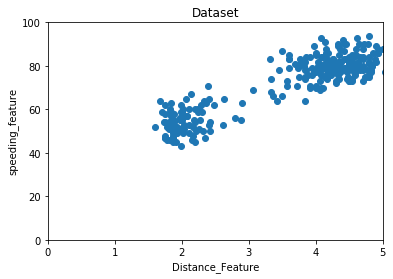

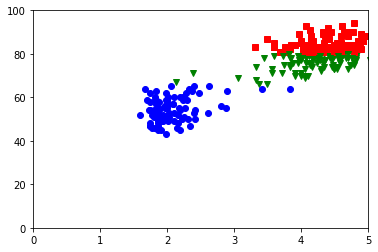

In [5]:
#program 8b.

from sklearn.cluster import KMeans
#from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("faithful.csv")
df1=pd.DataFrame(data)
f1 = df1['eruptions'].values
f2 = df1['waiting'].values
X=np.matrix(list(zip(f1,f2)))
plt.plot()
plt.xlim([0, 5])
plt.ylim([0, 100])
plt.title('Dataset')
plt.ylabel('speeding_feature')
plt.xlabel('Distance_Feature')
plt.scatter(f1,f2)
plt.show()
# create new plot and data
plt.plot()
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# KMeans algorithm
#K = 3
kmeans_model = KMeans(n_clusters=3).fit(X)
plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(f1[i], f2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 5])
    plt.ylim([0, 100])
plt.show()